##### Import libary

In [6]:
import fcgr
import numpy as np
import pandas as pd
from Bio import SeqIO
import time
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt

##### Define object

In [7]:
kaosr = importr('kaos')
seqinr = importr('seqinr')

##### fasta file path

In [8]:
file_path_ecoli = "../data/GCF_000005845.2_ASM584v2_genomic.fna"

In [9]:
def return_r_character_array(python_string):

    """
    Convert a Python string to an R character array.

    Parameters:
    python_string (str): The input Python string to be converted.

    Returns:
    r_char_array (rpy2.robjects.vectors.StrVector): An R character array containing the characters from the input string.
    """
    
    import rpy2.robjects as robjects

    r_char_array = robjects.StrVector(list(python_string))

    return r_char_array

##### Read fasta

In [10]:
python_sequence_ecoli =    fcgr.read_fasta(file_path_ecoli)
r_sequence  = return_r_character_array(python_sequence_ecoli)

In [11]:
def kaos_r(r_fasta_seq, k):

    start_time = time.time()
    x_cgr = kaosr.cgr(r_fasta_seq, res=k)
    end_time = time.time()

    return np.array(x_cgr.rx2('matrix')), (end_time - start_time)

In [12]:
def kaos_python(python_fasta_seq, kmer_length):
      
    chaos_game_kmer_array = fcgr.chaos_game_representation_key(kmer_length=kmer_length)
        
    start_time = time.time()
    
    fcgr_matrix = fcgr.chaos_frequency_matrix(fasta_string = python_fasta_seq, kmer_length= kmer_length, chaos_game_kmer_array= chaos_game_kmer_array, pseudo_count= False)[0]

    end_time = time.time()
    
    # print("Time taken: " + str(end_time - start_time))
    
    return fcgr_matrix, (end_time - start_time)
    

##### block to obtain time consumed by R kaos vs python fcgr

In [13]:
time_python = list()
time_r = list()
# corr_r = list()
corr_list = list()

python_fcgr = list()
r_fcgr = list()

for i in [1,2,3,4,5, 6,7,8,9, 10]:

    fcgr_ecoli, python_time = kaos_python(python_sequence_ecoli, kmer_length = i)
    python_fcgr.append(fcgr_ecoli)
    
    r_fcgr_ecoli, r_time = kaos_r(r_sequence, k =2**i)
    r_fcgr.append(r_fcgr_ecoli)
    time_python.append(python_time)
    time_r.append(r_time)
    print("Current kmer length is ", str(i))
    print(r_fcgr_ecoli.shape, fcgr_ecoli.shape)
    print("The correlation coefficient for ecoli is ",    str(np.round(pd.Series(r_fcgr_ecoli.ravel()).corr(pd.Series(fcgr_ecoli.ravel())),3)))
    corr_list.append(np.round(pd.Series(r_fcgr_ecoli.ravel()).corr(pd.Series(fcgr_ecoli.ravel())),3))
    print("_______")
    # break
    del fcgr_ecoli, r_fcgr_ecoli, r_time, python_time



Current kmer length is  1
(2, 2) (2, 2)
The correlation coefficient for ecoli is  -0.003
_______
Current kmer length is  2
(4, 4) (4, 4)
The correlation coefficient for ecoli is  -0.122
_______
Current kmer length is  3
(8, 8) (8, 8)
The correlation coefficient for ecoli is  -0.08
_______
Current kmer length is  4
(16, 16) (16, 16)
The correlation coefficient for ecoli is  -0.021
_______
Current kmer length is  5
(32, 32) (32, 32)
The correlation coefficient for ecoli is  0.002
_______
Current kmer length is  6
(64, 64) (64, 64)
The correlation coefficient for ecoli is  0.011
_______
Current kmer length is  7
(128, 128) (128, 128)
The correlation coefficient for ecoli is  0.019
_______
Current kmer length is  8
(256, 256) (256, 256)
The correlation coefficient for ecoli is  0.023
_______
Current kmer length is  9
(512, 512) (512, 512)
The correlation coefficient for ecoli is  0.024
_______
Current kmer length is  10
(1024, 1024) (1024, 1024)
The correlation coefficient for ecoli is  0.

##### Dataframe containing time taken

In [21]:
df = pd.DataFrame(columns=["fcgr", "kaos"])
df["kmer length"] = range(1, 11)
df["fcgr"] = time_python
df["kaos"] = time_r
df

,fcgr,kaos,kmer length
0,0.633853,97.314407,1
1,0.734742,95.895900,2
2,0.770834,95.742068,3
3,0.785296,96.196476,4
4,0.805071,96.241860,5
5,0.863689,96.229482,6
6,0.885275,96.215835,7
7,1.235109,96.004366,8
8,1.955642,96.125725,9
9,2.942716,96.409935,10


In [22]:
rounded_df = df.applymap(lambda x: round(x, 3))
rounded_df

/tmp/ipykernel_121926/3777255039.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rounded_df = df.applymap(lambda x: round(x, 3))


,fcgr,kaos,kmer length
0,0.634,97.314,1
1,0.735,95.896,2
2,0.771,95.742,3
3,0.785,96.196,4
4,0.805,96.242,5
5,0.864,96.229,6
6,0.885,96.216,7
7,1.235,96.004,8
8,1.956,96.126,9
9,2.943,96.410,10


In [23]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True):

    """
    Customize the appearance of matplotlib axis for a figure.

    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.

    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """

    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=0)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax

##### graph for time taken vs kmer length

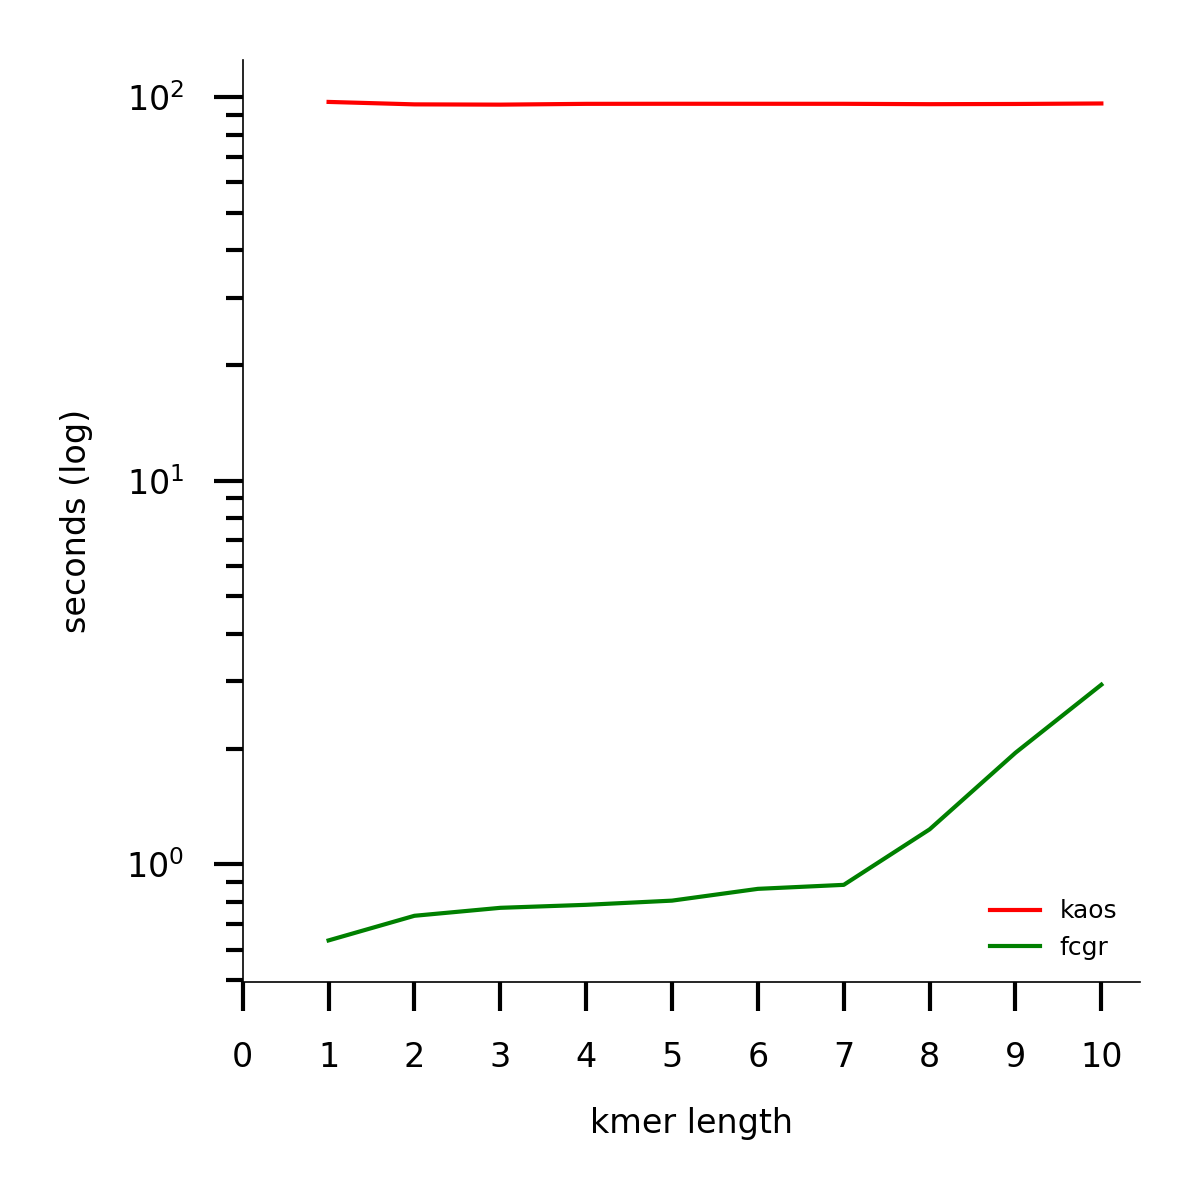

In [26]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize = (2.1, 2.1))

ax.plot(rounded_df["kmer length"], rounded_df["kaos"], lw = 0.5, color = "red", label = "kaos")
ax.plot(rounded_df["kmer length"], rounded_df["fcgr"], lw = 0.5, color = "green", label = "fcgr")

ax.set_xlabel("kmer length")
ax.set_ylabel("seconds (log)")
ax = custom_figure_axis(ax, fontsize=4, show_ticks = True)
ax.legend(frameon=False, fontsize = 3)
ax.set_yscale('log')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]);
plt.tight_layout()
plt.savefig("time.pdf", dpi = 600)